In [1]:
!pip install rna-fm
!pip install -U numpy
!pip install biopython
!pip uninstall -y numpy scipy scikit-learn
!pip install "numpy<2" scipy scikit-learn
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%run /content/drive/MyDrive/load_fm_model.py
get_fm_model()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
using cuda device


/usr/local/lib/python3.11/dist-packages/fm/pretrained.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(str(model_location), map_location="cpu")


(BioBertModel(
   (embed_tokens): Embedding(25, 640, padding_idx=1)
   (layers): ModuleList(
     (0-11): 12 x TransformerLayer(
       (self_attn): MultiheadAttention(
         (k_proj): Linear(in_features=640, out_features=640, bias=True)
         (v_proj): Linear(in_features=640, out_features=640, bias=True)
         (q_proj): Linear(in_features=640, out_features=640, bias=True)
         (out_proj): Linear(in_features=640, out_features=640, bias=True)
       )
       (self_attn_layer_norm): LayerNorm((640,), eps=1e-05, elementwise_affine=True)
       (fc1): Linear(in_features=640, out_features=5120, bias=True)
       (fc2): Linear(in_features=5120, out_features=640, bias=True)
       (final_layer_norm): LayerNorm((640,), eps=1e-05, elementwise_affine=True)
     )
   )
   (contact_head): ContactPredictionHead(
     (regression): Linear(in_features=240, out_features=1, bias=True)
     (activation): Sigmoid()
   )
   (embed_positions): LearnedPositionalEmbedding(1026, 640, padding_idx=

In [4]:
%run /content/drive/MyDrive/generate_real_embeddings_files.py
generate_files()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Counting sequences...
Number of sequences: 9834
Processing RNA sequences...
using cuda device


9834it [05:25, 30.21it/s]


In [5]:
%run /content/drive/MyDrive/generate_index_file.py
generate_index_file()

Generating embedding index file...
Embedding index file saved at: /content/drive/MyDrive/rna_data/rna_embeddings_index.txt


Distribution des nucléotides : {'A': 1072572, 'U': 982831, 'G': 950206, 'C': 941266}


<Figure size 640x480 with 0 Axes>

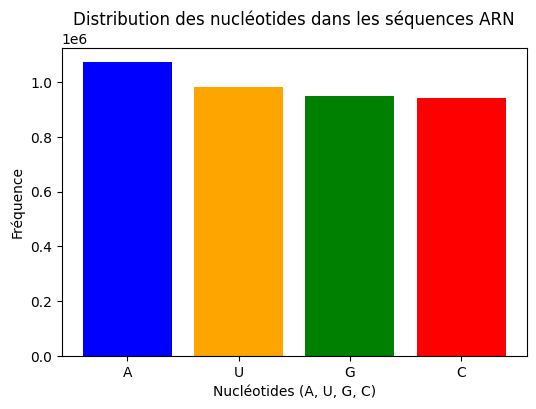

Distribution des catégories ARN : Counter({'Antisense': 1500, 'Long non-coding': 1500, 'Novel': 1500, 'Autre': 1500, 'microRNA': 1500, 'Divergent': 988, 'Host Gene': 578, 'Small nucleolar RNA': 444, 'Overlapping': 306, 'Long intergenic': 10, 'Regulatory': 8})


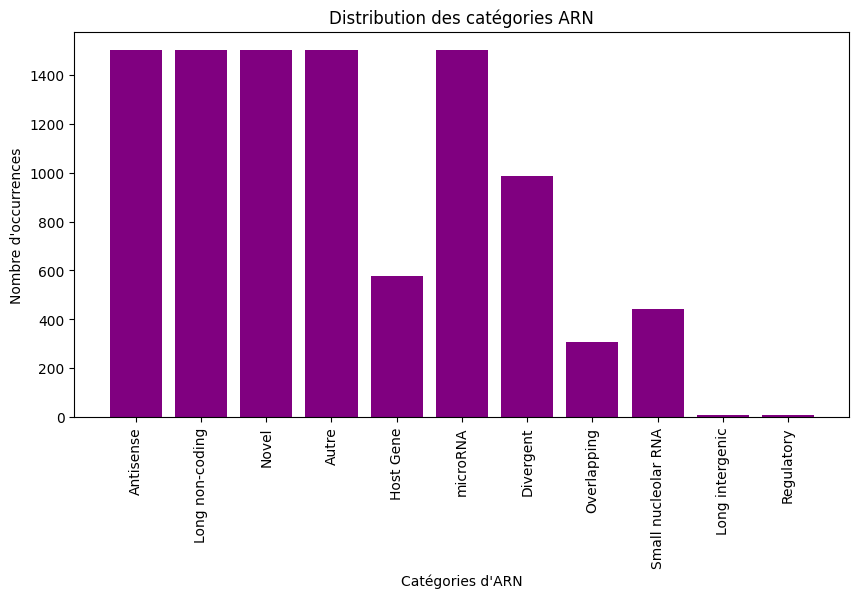

Analyzing Embedding Sizes: 100%|██████████| 9834/9834 [02:31<00:00, 65.01it/s] 


Nombre total d'embeddings analysés : 9834
Taille moyenne des embeddings : 403.35
Taille max des embeddings : 770
Taille min des embeddings : 45


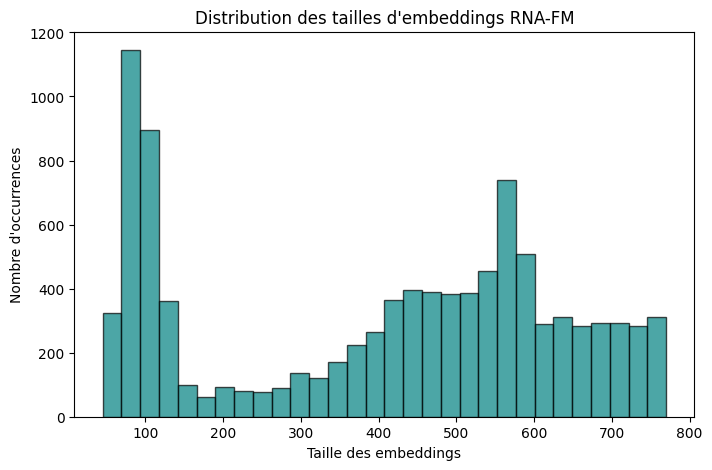

In [11]:
%run /content/drive/MyDrive/analyze_real_sequences.py
analyze_sequences()

In [12]:
%run /content/drive/MyDrive/train_encoder_decoder.py
train_encoder_decoder()


Nombre total de séquences ARN chargées : 9834
Nombre total de séquences ARN chargées : 9834


100%|██████████| 615/615 [01:02<00:00,  9.82it/s]


Epoch 1/6, Loss: 0.0765


100%|██████████| 615/615 [01:05<00:00,  9.41it/s]


Epoch 2/6, Loss: 0.0154


100%|██████████| 615/615 [01:02<00:00,  9.78it/s]


Epoch 3/6, Loss: 0.0066


100%|██████████| 615/615 [01:03<00:00,  9.74it/s]


Epoch 4/6, Loss: 0.0034


100%|██████████| 615/615 [01:02<00:00,  9.89it/s]


Epoch 5/6, Loss: 0.0020


100%|██████████| 615/615 [00:57<00:00, 10.73it/s]

Epoch 6/6, Loss: 0.0012
Entraînement terminé ✅


<Figure size 640x480 with 0 Axes>

In [15]:
%run /content/drive/MyDrive/generate_qformer_real_embeddings.py
generate_qformer_real_embeddings()

/content/drive/MyDrive/generate_qformer_real_embeddings.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  qformer.load_state_dict(torch.load("arn_model.pth", map_location

Nombre total de séquences ARN chargées : 9834
Extracting Q-Former embeddings...


100%|██████████| 615/615 [01:41<00:00,  6.07it/s]

✅ Extraction terminée !
Shape des embeddings complets : (9834, 16, 40)


In [25]:
%run /content/drive/MyDrive/evaluate_model.py
compute_ned()


NLL normalisé: 1.7124, NED: 0.6342


In [43]:
%run /content/drive/MyDrive/one_sequence_reconstructed.py
one_sequence_reconstructed()

Séquence originale : AUGGAGAGAUGUGUGUUACUUGUUAUGUGGCUCCCUAAAAAGAAACAUUACCAGUUAGAGGGACUUCAAGUAACUGAGGCCACCAAUUUCUACUUUCGCUCUACUUUUUCUGGGAGUGGAACGGUCAGGUUUGCCAGUAUUGUGAAAAUCCAUGAGGAAGCAUUACUUCUCUCUUCCACUUGCCUCAUUCUGAGUGGAACCCCAGAACCUGGUGUAGGGCUUAAUAAUCCAAGAAAUUAUUUUGAGUGGAGAAUCUCUCACUCUCUGGCUCUUUUCUCCCAAUAGUAACAAUAAUAAUGCCUCACUUGUUAAGAGAUACCGUGGUUAUUGAAGUAUUUUCUCAGCAAACAGAUACUUCAUGUUUGGGUGUAUUAAUGUAGGAAGAUAAAGACACACAUGCAGUGUUUCCUAAACUUUUUGGCUCACAUGCUUCUUUGCUCAUGCACAACCUAGACAAAACUAUGUAACCAACUCCUGUGUACAGUUUCACGGAAUUGCAGGGAGGUGCCCAAUAAAUACCGAGAGACGAACGGAACCGCUGAAUCCCGUCCGCGAGGUUAGGGGAGAAACAGAAGCGGCAACGUCUCUGCUGCACGAAGCACCCGAUCCACACCAUUAGUAAACCCCAUCAAUUUUGCCUUCAGAAUAUAUCCAGAUUCUUCCCAAUUCUACCGCCACCAUUCUGGUUCAAGCUACCUG
Séquence reconstruite : GAAAGAGAGAAAAAAAAGGAAAAAGAAAAAGAGGGAGGGGGAGGGGGAAGGGGAAAGAGAAAGGAAGGGAAGGGAAGAAGGGGUGGAAAGAAGAAAGAGAGAGGAAAAAGAAAAGAAAAGGGAAAGGAAAAAAGGGAAGAAAAAGGGGAGGGAAGAAGGAGGAAGGCAGAGAGAAGUGGAAAGGAGGAAGAAGAAAAGGGGGGGAGAGGAAAAAAGAAAGAAGGAGGAGGGAAGGGAAGAAAAAGAAAAGAGGAG

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c5d175fcf40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Nombre total de séquences ARN chargées : 9834
Running t-SNE...
t-SNE output shape: (9834, 2)
Unique labels: ['Antisense', 'Autre', 'Divergent', 'Host', 'Long', 'Novel', 'Overlapping', 'Regulatory', 'Small', 'microRNA']


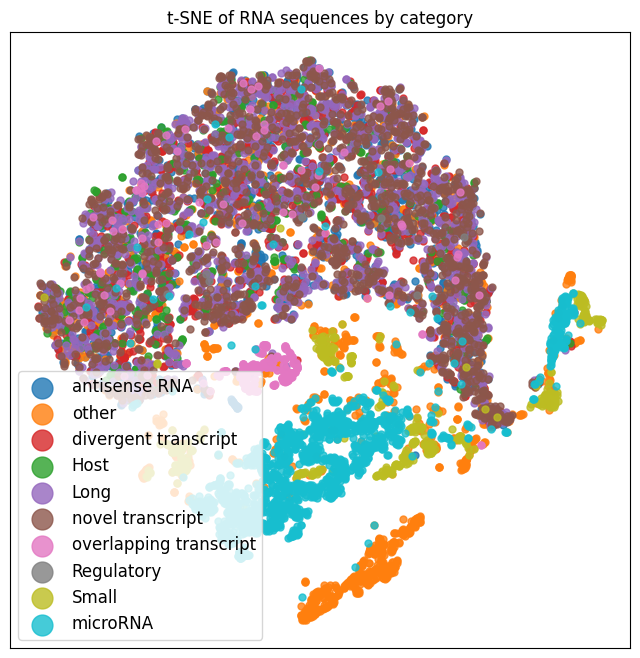

In [45]:
%run /content/drive/MyDrive/t_sne_qformer_embeddings.py
t_sne_qformer_embeddings()

In [46]:
%run /content/drive/MyDrive/diffusion_model.py
diffusion_model_training()

Starting training...
Epoch 1/12: Loss = 0.854241
Epoch 2/12: Loss = 0.638500
Epoch 3/12: Loss = 0.567803
Epoch 4/12: Loss = 0.538948
Epoch 5/12: Loss = 0.533046
Epoch 6/12: Loss = 0.530668
Epoch 7/12: Loss = 0.530566
Epoch 8/12: Loss = 0.531080
Epoch 9/12: Loss = 0.528544
Epoch 10/12: Loss = 0.531037
Epoch 11/12: Loss = 0.529917
Epoch 12/12: Loss = 0.526999


<Figure size 640x480 with 0 Axes>

using cuda device


/usr/local/lib/python3.11/dist-packages/fm/pretrained.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(str(model_location), map_location="cpu")


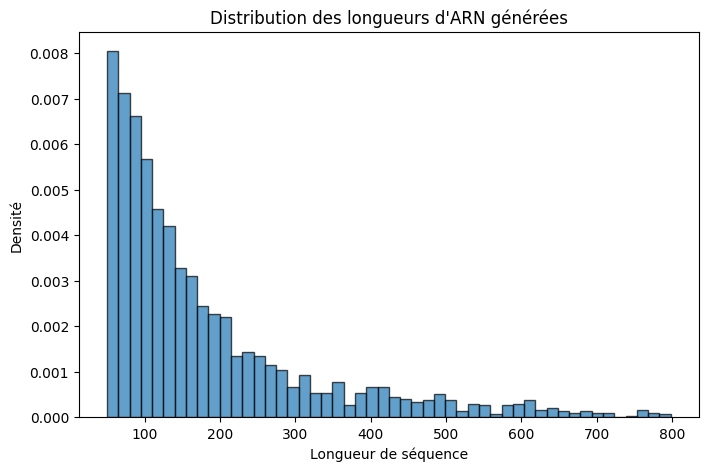

/content/drive/MyDrive/generate_random_qformer_embeddings.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  qformer.load_state_dict(torch.load("arn_model.pth", map_locati

Exemple de séquence générée : UCACAAAUCCGGUAUCGGCCUCCCCCCGGGGUAAAUGUGAGUUUGCAAACAUUCUAUCAAAUGCCCCUAGGUGAGGAAAC ...
Longueur de cette séquence : 387
Nombre de séquences : 2000


RNA‑FM: 100%|██████████| 2000/2000 [00:22<00:00, 88.92it/s]

✅ Extraction terminée !


<Figure size 640x480 with 0 Axes>

In [48]:
%run /content/drive/MyDrive/generate_random_qformer_embeddings.py
generate_random_qformer_embeddings()

Running t-SNE on the combined latent space...


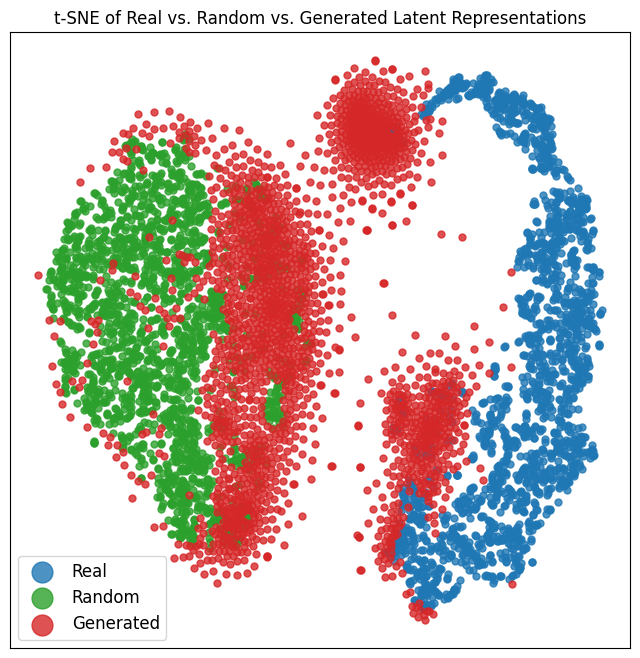

In [51]:
%run /content/drive/MyDrive/t_sne_real_vs_generated_vs_random.py
t_sne_real_vs_generated_vs_random()